In [33]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import FileUpload
from PIL import Image
import numpy as np

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/rayha/OneDrive/Dokumen/Porfolio/2024/Agustus/hand-sign/Train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/rayha/OneDrive/Dokumen/Porfolio/2024/Agustus/hand-sign/Test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [4]:
model = models.Sequential([
    Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,296 (2.62 MB)

 Trainable params: 686,296 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stopping = EarlyStopping(
    monitor='val_loss',       
    min_delta=0.001,           
    patience=5,               
    verbose=1,                 
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/50


c:\Users\rayha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 367s 423ms/step - accuracy: 0.1296 - loss: 2.8853 - val_accuracy: 0.6856 - val_loss: 1.0091
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.5578 - loss: 1.3467 - val_accuracy: 0.7733 - val_loss: 0.6621
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 53s 61ms/step - accuracy: 0.6982 - loss: 0.9265 - val_accuracy: 0.8461 - val_loss: 0.4042
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.7606 - loss: 0.7078 - val_accuracy: 0.8918 - val_loss: 0.3051
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 54s 62ms/step - accuracy: 0.8070 - loss: 0.5751 - val_accuracy: 0.8816 - val_loss: 0.3052
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 320s 373ms/step - accuracy: 0.8361 - loss: 0.4970 - val_accuracy: 0.8805 - val_loss: 0.2939
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.8553 - loss: 0.4278 - val_accuracy: 0.9123 - val_loss: 0.2394
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.8663 - loss: 0.3873 - val_acc

In [6]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9876 - loss: 0.0315
Test Accuracy: 98.80%


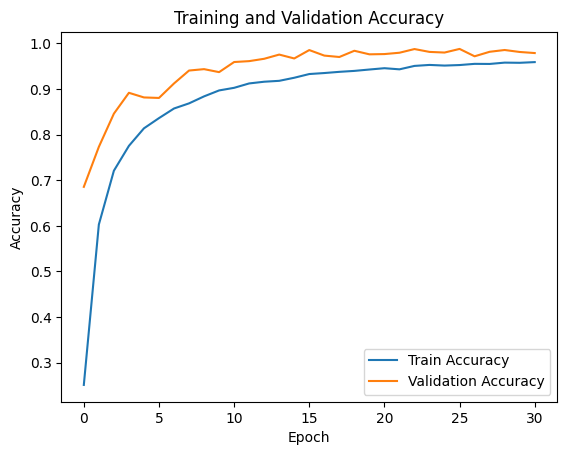

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

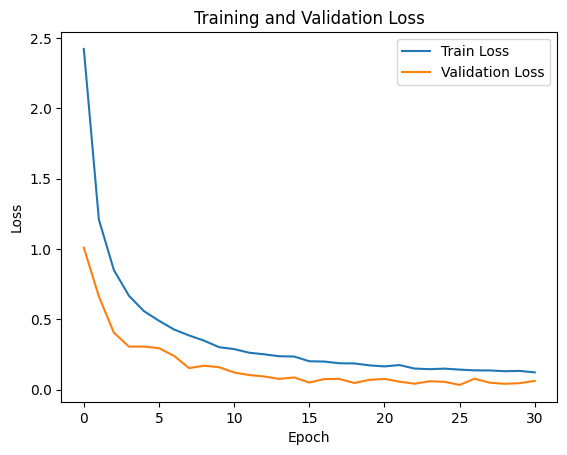

In [8]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()